## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2,0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (dropout))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-dropout-%s" % str(dropout)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.200000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________________________________________________

Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.3901 - acc: 0.5003 - val_loss: 1.3893 - val_acc: 0.4984
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3903 - acc: 0.5002 - val_loss: 1.3985 - val_acc: 0.5017
Epoch 45/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3836 - acc: 0.5032 - val_loss: 1.4011 - val_acc: 0.5032
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.3837 - acc: 0.5019 - val_loss: 1.3942 - val_acc: 0.5059
Epoch 47/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.3914 - acc: 0.4985 - val_loss: 1.4012 - val_acc: 0.4932
Epoch 48/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3746 - acc: 0.5064 - val_loss: 1.3753 - val_acc: 0.5117
Epoch 49/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.3682 - acc: 0.5045 - val_loss: 1.3632 - val_acc: 0.5142
Epoch 50/50
50000/50000 [==

50000/50000 [==============================] - 7s 142us/step - loss: 2.0015 - acc: 0.2306 - val_loss: 2.0918 - val_acc: 0.2173
Epoch 42/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.9977 - acc: 0.2315 - val_loss: 2.0508 - val_acc: 0.2439
Epoch 43/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.9927 - acc: 0.2355 - val_loss: 2.0489 - val_acc: 0.2348
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.9938 - acc: 0.2337 - val_loss: 2.0462 - val_acc: 0.2303
Epoch 45/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.9916 - acc: 0.2348 - val_loss: 2.0353 - val_acc: 0.2373
Epoch 46/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.9937 - acc: 0.2347 - val_loss: 2.0421 - val_acc: 0.2330
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.9896 - acc: 0.2349 - val_loss: 2.0293 - val_acc: 0.2280
Epoch 48/50
50000/50000 [==============

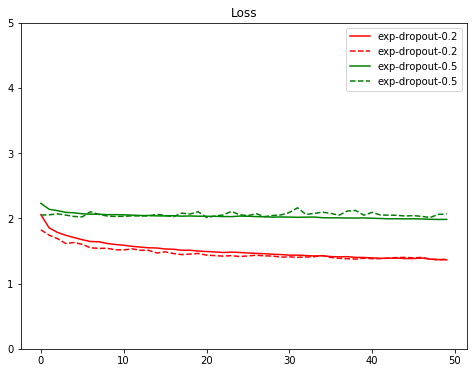

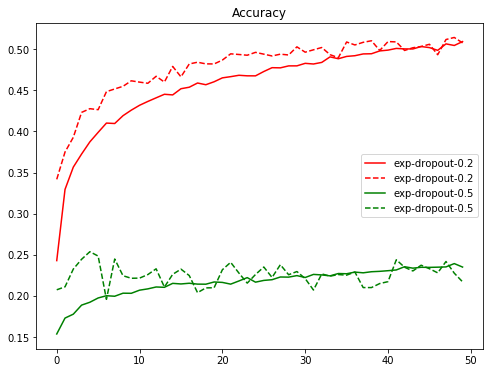

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()